<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/ImageEnhancement/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image:


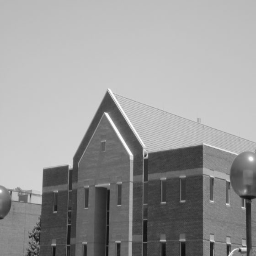

Histogram:


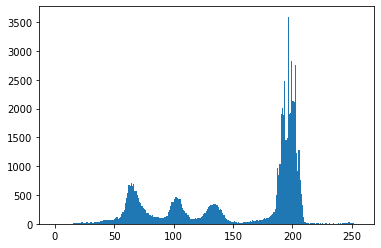

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/Edge.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))
print('Original Image:')
cv2_imshow(image)
print("Histogram:")
plt.hist(image.ravel(), 256, [0,256])
plt.show()

In [38]:
# Convolution 

def convolution(image, mask):
  x = mask.shape[0]
  y = mask.shape[1]
  out = np.zeros(((int(image.shape[0] - x + 1)), (int(image.shape[1] - y + 1))))
  for i in range(out.shape[0]):
    for j in range(out.shape[1]):
      temp = np.sum(image[i:i+x, j:j+y]*mask) / (x*y)
      out[i][j] = temp


  return out

Image after applying average filter:


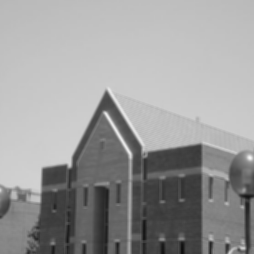

Histogram:


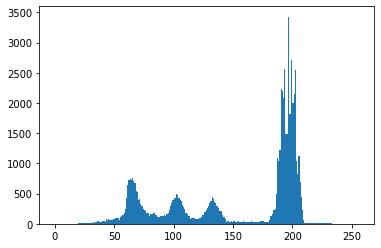

In [46]:
import numpy as np

# low pass filter
mask = np.array([[1, 1, 1], 
                 [1, 1, 1], 
                 [1, 1, 1]])
new_image = convolution(image, mask)


print('Image after applying average filter:')
cv2_imshow(new_image)
print("Histogram:")
plt.hist(new_image.ravel(), 256, [0,256])
plt.show()

Image after applying high pass filter(laplacian):


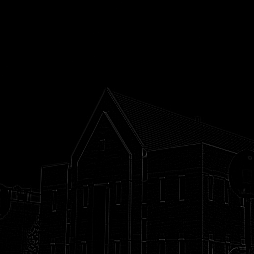

Original image:


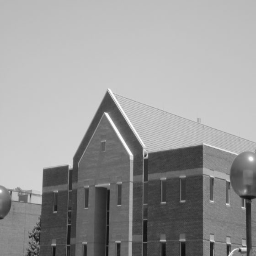

Image after applying average filter(laplacian) + Original image:
<laplacian edge detection>


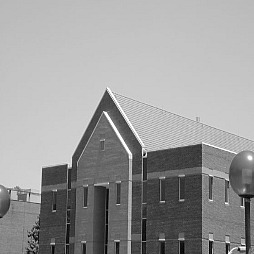

In [58]:
# high pass filter (laplacian)
mask = np.array([[-1, -1, -1], 
                 [-1, 8, -1], 
                 [-1, -1, -1]])
new_image = convolution(image, mask)

####################
print('Image after applying high pass filter(laplacian):')
cv2_imshow(new_image)
# print("Histogram:")
# plt.hist(new_image.ravel(), 256, [0,256])
# plt.show()

####################
print('Original image:')
cv2_imshow(image)
###################
neww_image = image[1:255, 1:255] + new_image
print('Image after applying average filter(laplacian) + Original image:')
print('<Enhanced>')
cv2_imshow(neww_image)
# print("Histogram:")
# plt.hist(new_image.ravel(), 256, [0,256])
# plt.show()

Image after applying sobel filter (x direction):


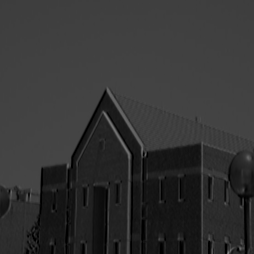

Image after applying sobel filter (y direction):


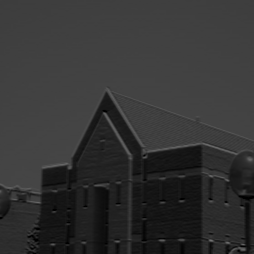

Image after applying sobel filter (x_y direction):


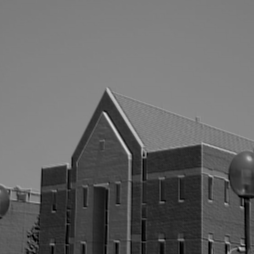

In [64]:
# sobel filter in x direction 
mask_x = np.array([[-1, 1, 1], 
                 [-2, 1, 2], 
                 [-1, 1, 1]])
new_image_x = convolution(image, mask_x)
print('Image after applying sobel filter (x direction):')
cv2_imshow(new_image_x)

# sobel filter in y direction 
mask_y = np.array([[1, 2, 1], 
                 [1, 1, 1], 
                 [-1, -2, -1]])
new_image_y = convolution(image, mask_y)
print('Image after applying sobel filter (y direction):')
cv2_imshow(new_image_y)

##############################
x_y_image = new_image_x + new_image_y 
print('Image after applying sobel filter (x_y direction):')
cv2_imshow(x_y_image)
# print("Histogram:")
# plt.hist(new_image.ravel(), 256, [0,256])
# plt.show()